In [ ]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/sintetico.csv', delimiter=';')

# Número de registros (filas)
num_filas = df.shape[0]

# Número de columnas
num_columnas = df.shape[1]

print(f"Número de registros (filas): {num_filas}")
print(f"Número de columnas: {num_columnas}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de registros (filas): 100000
Número de columnas: 165


In [ ]:
#Para ver que es lo que tienen los primeros registros de la base sintetico
#display(df.head())
print(df.columns.tolist())

['uid_encuesta', 'depto', 'mpio', 'clase', 'territorio_etnico', 'sel_terr_etnico', 'tipo_novedad', 'nov_carto', 'ubica', 'condocu', 'condocu_a', 'pohsocio', 'pomsocio', 'potsocio', 'pohfsocio', 'pomfsocio', 'poftsocio', 'pohperm', 'pomperm', 'potperm', 'pohfijo', 'pomfijo', 'potfijo', 'pohespe', 'pomespe', 'potespe', 'pohtemp', 'pomtemp', 'pottemp', 'pohapv', 'pomapv', 'potapv', 'pohtot', 'pomtot', 'pottot', 'salpermh', 'salpermm', 'salfijoh', 'salfijom', 'saltemph', 'saltempm', 'shsocio', 'smsocio', 'phsocio', 'pmsocio', 'shfsocio', 'smfsocio', 'phfsocio', 'pmfsocio', 'shperm', 'smperm', 'phperm', 'pmperm', 'shfijo', 'smfijo', 'phfijo', 'pmfijo', 'shtemp', 'smtemp', 'phtemp', 'pmtemp', 'shapv', 'smapv', 'phapv', 'pmapv', 'ahsocio', 'amsocio', 'ahfsocio', 'amfsocio', 'ahperm', 'amperm', 'ahfijo', 'amfijo', 'ahtemp', 'amtemp', 'ahapv', 'amapv', 'ptnhperm', 'ptnmperm', 'ptnhfijo', 'ptnmfijo', 'ptnhtemp', 'ptnmtemp', 'costo_mpe', 'costo_maq', 'costo_mmto', 'costo_vta', 'costo_serv', 'cost

In [ ]:
#1. Exploración y Pre-procesamiento (EDA)
#a. Realizar un análisis exploratorio (EDA) sobre el dataset sintético.
# Convertir los nombres de columnas a minúsculas y eliminar espacios
df.columns = df.columns.str.lower().str.strip()

# Clasificar columnas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
categoricas = df.select_dtypes(include=['object', 'category']).columns

# Crear tabla de resumen
resumen = pd.DataFrame(index=df.columns)
resumen['Tipo'] = ['Numérica' if col in numericas else 'Categórica' for col in df.columns]
resumen['Valores Únicos'] = df.nunique()
resumen['% Nulos'] = df.isnull().mean() * 100
resumen['Nulos (Cantidad)'] = df.isnull().sum()

# Agregar estadísticas para numéricas
resumen['Media'] = df[numericas].mean()
resumen['Mediana'] = df[numericas].median()
resumen['Desv. Est.'] = df[numericas].std()

# Ordenar por tipo y mostrar
resumen = resumen.sort_values(by='Tipo')
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
print(resumen)

                 Tipo  Valores Únicos  % Nulos  Nulos (Cantidad)      Media  \
tapoyo     Categórica               7    49.87             49871        NaN   
estaux     Categórica               2     0.00                 0        NaN   
idtipodoc  Categórica               7     0.00                 0        NaN   
camcomer   Categórica               2    49.61             49615        NaN   
alcal      Categórica               2    49.61             49615        NaN   
...               ...             ...      ...               ...        ...   
pmtemp       Numérica              21     0.00                 0       9.98   
shapv        Numérica              11     0.00                 0       5.00   
smapv        Numérica              11     0.00                 0       5.00   
costo_maq    Numérica           99999     0.00                 0 137,058.08   
mesopa       Numérica              13    98.43             98426       5.99   

             Mediana  Desv. Est.  
tapoyo          

In [ ]:
# 1.b.1: Distribución de variables númericas (Descriptivos)
print("\nResumen estadístico:")
print(df[numericas].describe().T)


Resumen estadístico:
                       count       mean        std      min        25%  \
uid_encuesta      100,000.00 522,823.84 302,873.74     1.00 260,714.75   
depto             100,000.00      52.10      30.75     5.00      20.00   
mpio              100,000.00  52,508.50  30,756.64 5,001.00  20,175.00   
clase             100,000.00       1.90       0.30     1.00       2.00   
territorio_etnico 100,000.00       1.55       0.50     1.00       1.00   
...                      ...        ...        ...      ...        ...   
nemp              100,000.00       5.00       2.58     1.00       3.00   
otra_aut          100,000.00       1.50       0.50     1.00       1.00   
renov_cam         100,000.00       1.50       0.50     1.00       1.00   
idaio             100,000.00   1,991.45      18.48 1,960.00   1,975.00   
mesopa              1,574.00       5.99       3.69     0.00       3.00   

                         50%        75%          max  
uid_encuesta      521,113.50 784,4

In [ ]:
# 1.b.2: Distribución de variables cualitativas - categoricas (Descriptivos)
print("\nDistribución de variables categóricas:")
for col in categoricas:
    print(f"{col}: {df[col].nunique()} categorías únicas")


Distribución de variables categóricas:
tipo_novedad: 8 categorías únicas
nov_carto: 4 categorías únicas
ubica: 4 categorías únicas
condocu: 3 categorías únicas
condocu_a: 3 categorías únicas
idtipodoc: 7 categorías únicas
estaux: 2 categorías únicas
tapoyo: 7 categorías únicas
ciiu_6b: 9 categorías únicas
camcomer: 2 categorías únicas
alcal: 2 categorías únicas
minist: 2 categorías únicas
secdep: 2 categorías únicas
orpub: 2 categorías únicas
superint: 2 categorías únicas
tipo_org: 3 categorías únicas
per_jur: 6 categorías únicas
reg_cont: 4 categorías únicas


In [ ]:
# 1.c.1: Detección de valores atípicos (basado en rango intercuartílico)
print("\nValores atípicos detectados (método IQR):")
for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} posibles outliers")



Valores atípicos detectados (método IQR):
uid_encuesta: 0 posibles outliers
depto: 0 posibles outliers
mpio: 0 posibles outliers
clase: 10185 posibles outliers
territorio_etnico: 0 posibles outliers
sel_terr_etnico: 0 posibles outliers
pohsocio: 0 posibles outliers
pomsocio: 0 posibles outliers
potsocio: 0 posibles outliers
pohfsocio: 0 posibles outliers
pomfsocio: 0 posibles outliers
poftsocio: 0 posibles outliers
pohperm: 0 posibles outliers
pomperm: 0 posibles outliers
potperm: 0 posibles outliers
pohfijo: 0 posibles outliers
pomfijo: 0 posibles outliers
potfijo: 0 posibles outliers
pohespe: 0 posibles outliers
pomespe: 0 posibles outliers
potespe: 0 posibles outliers
pohtemp: 0 posibles outliers
pomtemp: 0 posibles outliers
pottemp: 0 posibles outliers
pohapv: 0 posibles outliers
pomapv: 0 posibles outliers
potapv: 0 posibles outliers
pohtot: 235 posibles outliers
pomtot: 239 posibles outliers
pottot: 518 posibles outliers
salpermh: 1374 posibles outliers
salpermm: 1137 posibles o

In [ ]:
# 1.c.2: Calidad de los datos
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
uid_encuesta             0
depto                    0
mpio                     0
clase                    0
territorio_etnico        0
                     ...  
tipo_org                 0
per_jur              66680
reg_cont                 0
idaio                    0
mesopa               98426
Length: 165, dtype: int64


#identificadores_directos = [`idcedula`, `idnit`, `idtipodoc`]
No se encuentran columnas como 'nombre', 'cedula', 'direccion' o 'correo'.Sin embargo, variables como `idcedula`, `idnit`, `idtipodoc` podrían ser sensibles si contienen datos personales.

#cuasi_identificadores = [
    'depto',              # → departamento
    'mpio',               # → municipio
    'clase',              # → área rural o urbana
    'territorio_etnico',  # → podría revelar pertenencia a una comunidad específica
    'sel_terr_etnico',    # → selección de grupo étnico
    'sexo',               # → inferido si se deriva de variables como `shsocio`, `smsocio` (por sexo)
    'edad'                # → no aparece explícita pero podría inferirse de `ahsocio`, `amsocio`, etc.
]

#variables_sensibles = [
    'ing_total',          # → ingreso total
    'ing_ind', 'ing_maquil', 'ing_serv',  # → ingreso por actividades económicas
    'estado_salud',       # → no explícita, pero si existiera sería sensible
    'religion',           # → no está en el dataset
    'orientacion_sexual'  # → no está en el dataset
]

### `uid_encuesta` → ID único de encuesta (no sensible si no está vinculado a un identificador directo)
# Según la guía del DANE, no se considera identificador directo si no puede vincularse a un individuo.


In [ ]:
# 1.d: Identificación de variables clave
# Lista de columnas del dataset
columnas = df.columns.tolist()

# Clasificación
identificadores_directos = [col for col in columnas if col in ['nombre', 'cedula', 'direccion', 'correo'] or 'idcedula' in col or 'idnit' in col or 'idtipodoc' in col]
cuasi_identificadores = [
    col for col in columnas if col in ['depto', 'mpio', 'clase', 'territorio_etnico', 'sel_terr_etnico'] or
    'sexo' in col.lower() or 'edad' in col.lower() or 'estado_civil' in col.lower() or 'nivel_educativo' in col.lower()
]
variables_sensibles = [
    col for col in columnas if 'ing' in col.lower() or 'salud' in col.lower() or 'religion' in col.lower() or 'orientacion_sexual' in col.lower()
]
otros_posibles_ids = [
    col for col in columnas if ('uid' in col.lower() or 'id' in col.lower()) and
    col not in identificadores_directos + cuasi_identificadores + variables_sensibles
]

# Crear DataFrame de resumen
max_len = max(len(identificadores_directos), len(cuasi_identificadores), len(variables_sensibles), len(otros_posibles_ids))
data = {
    'Identificadores Directos': identificadores_directos + [''] * (max_len - len(identificadores_directos)),
    'Cuasi-identificadores': cuasi_identificadores + [''] * (max_len - len(cuasi_identificadores)),
    'Variables Sensibles': variables_sensibles + [''] * (max_len - len(variables_sensibles)),
    'Otros posibles IDs': otros_posibles_ids + [''] * (max_len - len(otros_posibles_ids))
}

tabla_clasificacion = pd.DataFrame(data)

# Mostrar la tabla
print("\n📋 Clasificación de columnas del dataset:")
print(tabla_clasificacion)



📋 Clasificación de columnas del dataset:
   Identificadores Directos Cuasi-identificadores Variables Sensibles  \
0                     idnit                 depto             ing_ind   
1                 idtipodoc                  mpio          ing_maquil   
2                  idcedula                 clase            ing_mmto   
3                               territorio_etnico             ing_com   
4                                 sel_terr_etnico            ing_serv   
5                                    tipo_novedad           ing_finan   
6                                                         ing_otroper   
7                                                             ing_don   
8                                                        ing_construc   
9                                                           ing_alqme   
10                                                          ing_total   

   Otros posibles IDs  
0        uid_encuesta  
1               idrut  
2        

In [ ]:
#1.e Clasificación previa
identificadores_directos = ['idcedula', 'idnit', 'idtipodoc']
cuasi_identificadores = ['depto', 'mpio', 'clase', 'territorio_etnico', 'sel_terr_etnico']
variables_sensibles = [col for col in df.columns if 'ing' in col.lower()]
otros_ids = ['uid_encuesta']

# Variables para visualizar (todas las clasificadas)
todas_vars = identificadores_directos + cuasi_identificadores + variables_sensibles + otros_ids
todas_vars = [col for col in todas_vars if col in df.columns]  # Asegura que existan

# Separar categóricas y numéricas
categ_vars = [col for col in todas_vars if df[col].dtype == 'object' or df[col].nunique() < 15]
num_vars = [col for col in todas_vars if col not in categ_vars]

# Visualización
sns.set(style="whitegrid")

<ipython-input-38-9873a7a61caa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


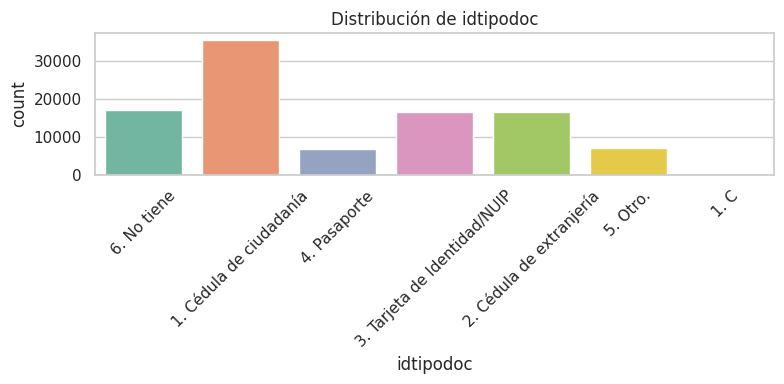

<ipython-input-38-9873a7a61caa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


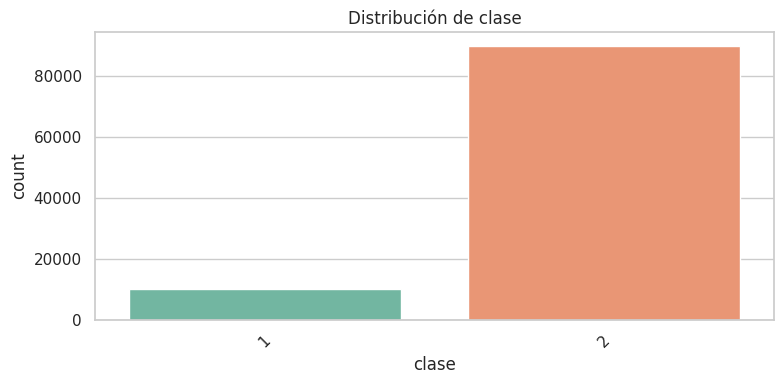

<ipython-input-38-9873a7a61caa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


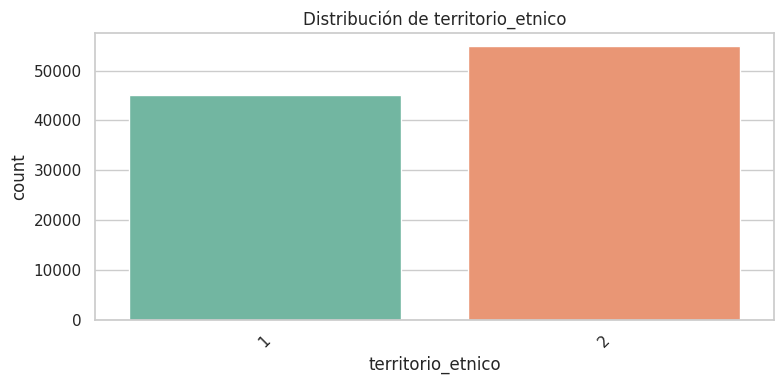

<ipython-input-38-9873a7a61caa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


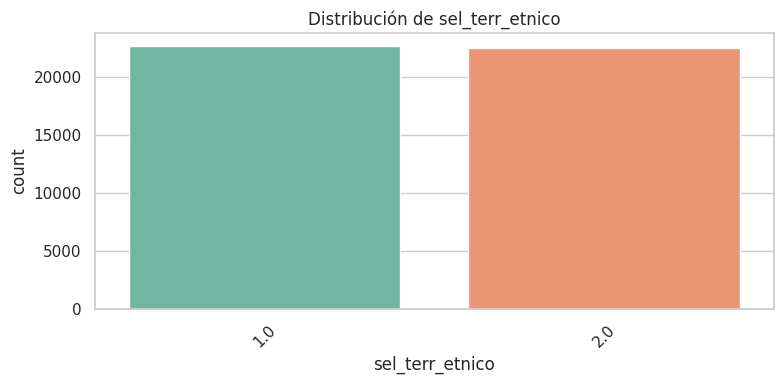

In [ ]:
# 1.e.1 Variables categóricas
for col in categ_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

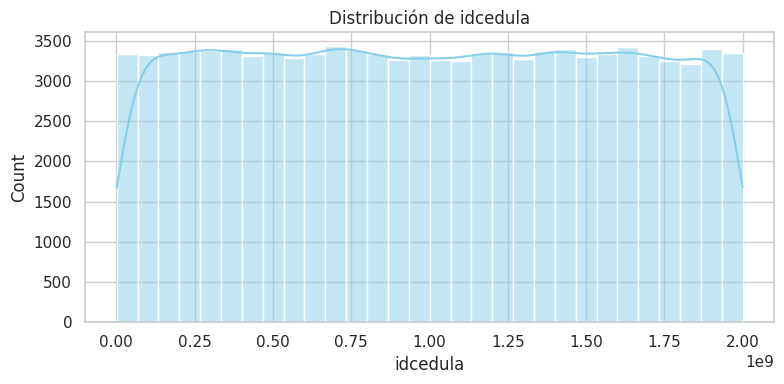

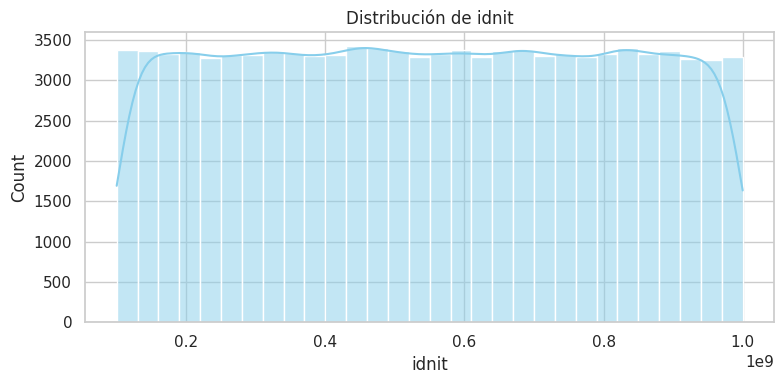

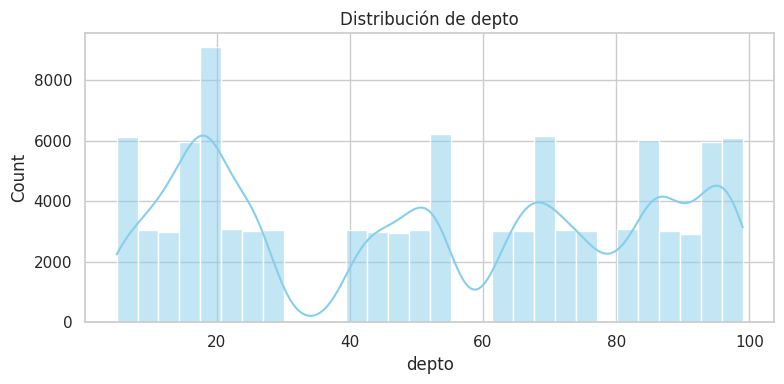

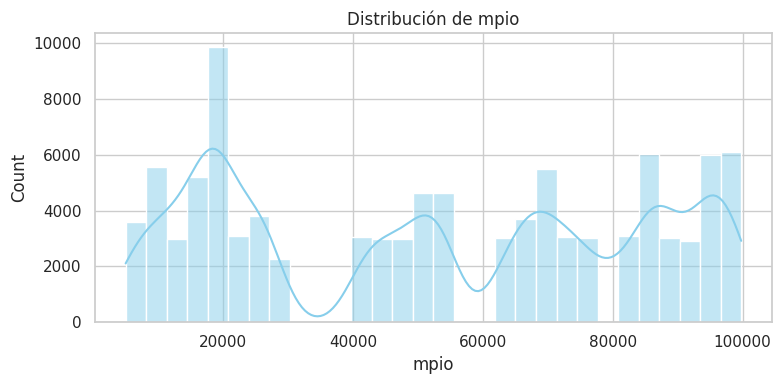

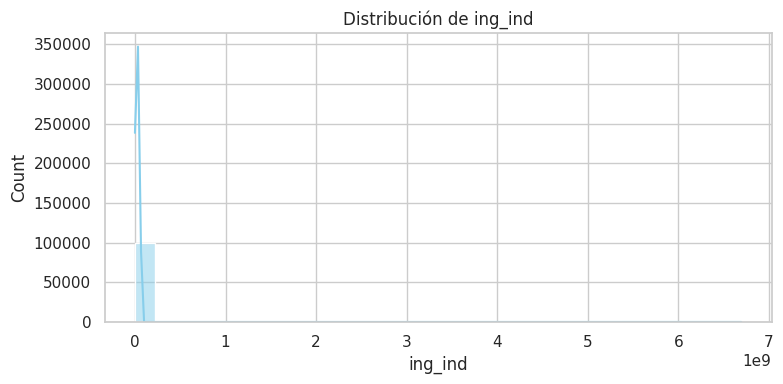

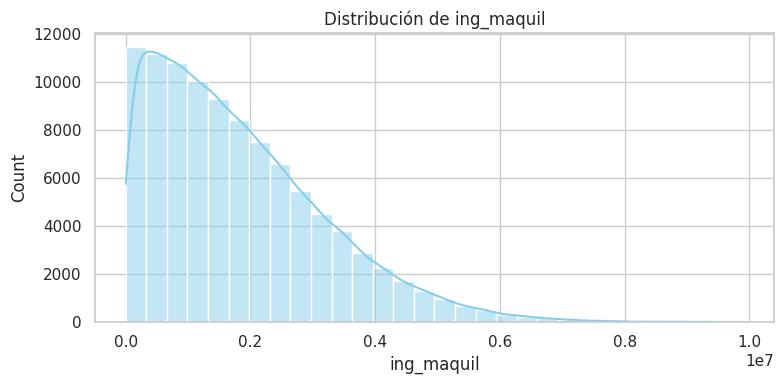

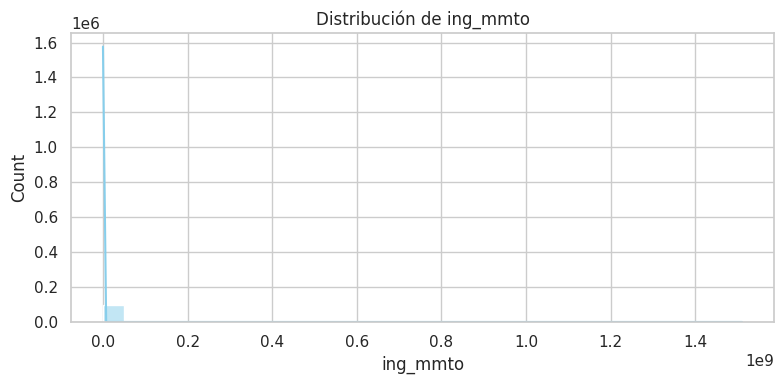

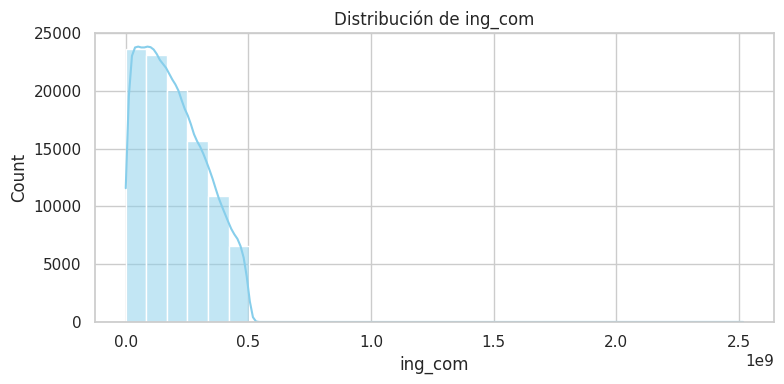

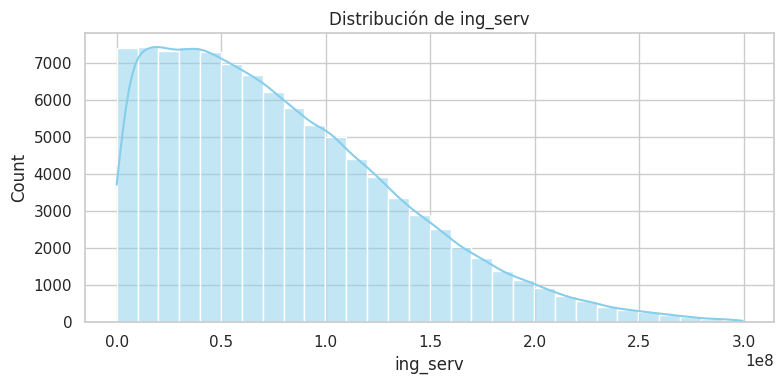

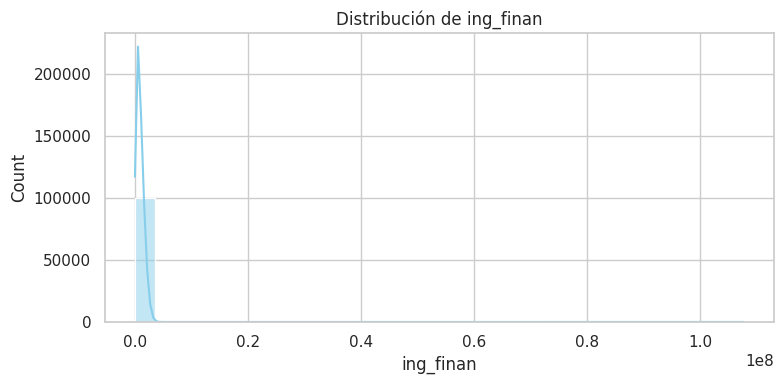

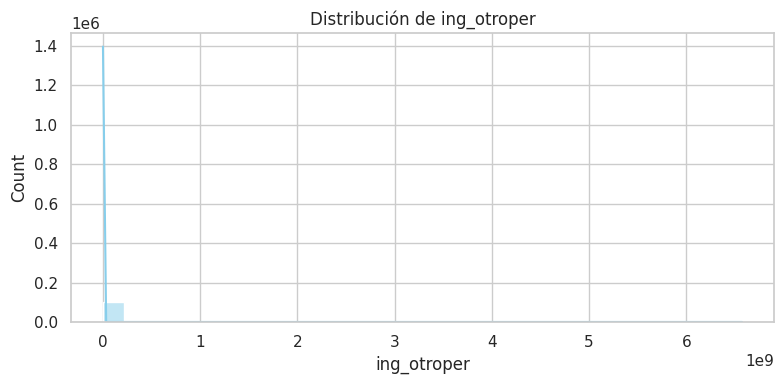

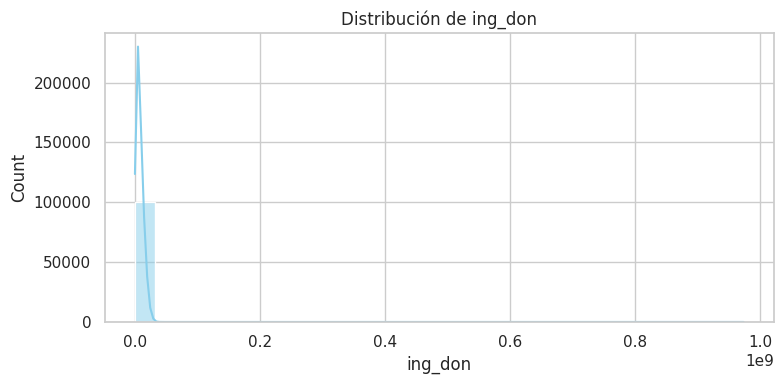

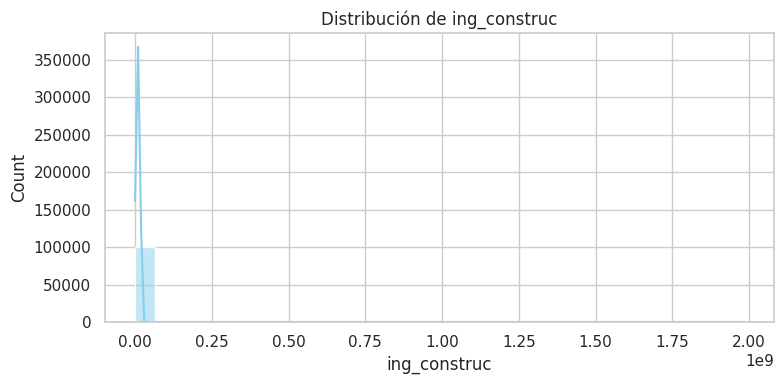

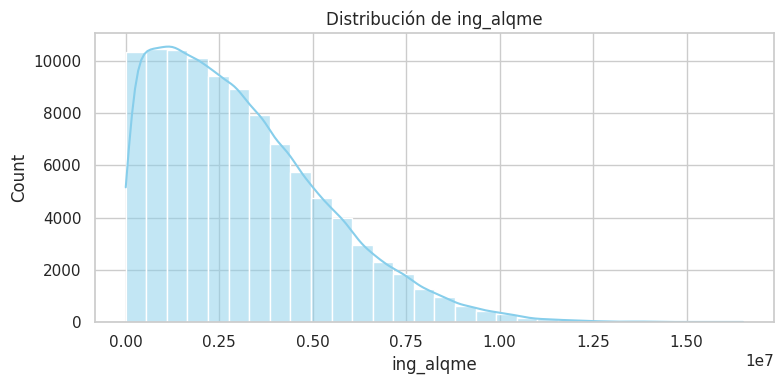

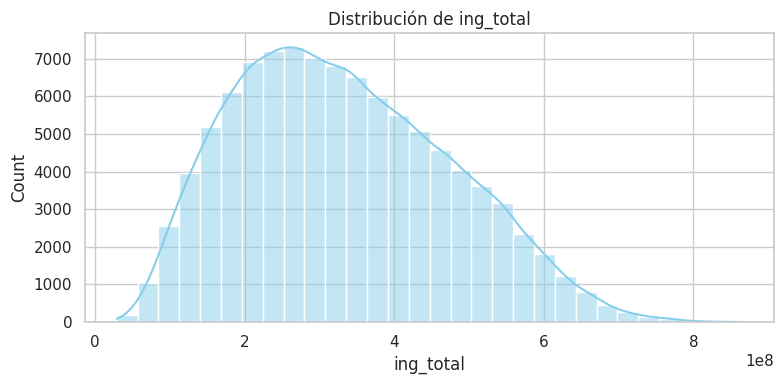

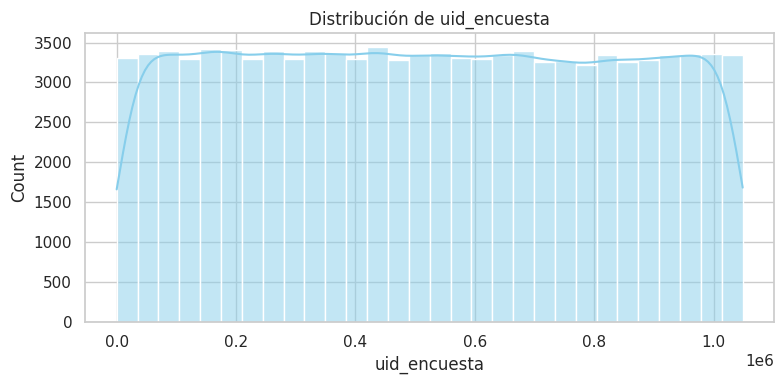

In [ ]:
# 1.e.2 Variables numéricas
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
#2. Anonimización de datos

# Clasificación de variables según el usuario
identificadores_directos = ['idcedula', 'idnit', 'idaio']  # nombres aproximados de identificadores
cuasi_identificadores = ['depto', 'mpio', 'clase', 'territorio_etnico']  # usando proxies disponibles
variables_sensibles = ['ing_total', 'ing_ind', 'ing_finan']  # ejemplos de ingresos

# Copia del dataframe para anonimización
df_anon = df.copy()

# -------------------------
# 1. Supresión (Identificadores Directos)
# -------------------------
#Se eliminan las columnas que son identificadores directos, porque su sola presencia puede comprometer la privacidad.
df_anon.drop(columns=identificadores_directos, inplace=True, errors='ignore')

# -------------------------
# 2. Generalización (Cuasi-identificadores)
# -------------------------
#Se simplifican los códigos de departamento y municipio para evitar precisión exacta.
#Se agrupa la variable clase en categorías más amplias.

# Generalizar municipios y departamentos a códigos de región simulados
if 'depto' in df_anon.columns:
    df_anon['depto'] = df_anon['depto'].astype(str).str[:2]  # tomar solo los dos primeros dígitos
if 'mpio' in df_anon.columns:
    df_anon['mpio'] = df_anon['mpio'].astype(str).str[:3]  # generalizar a un nivel más alto

# Generalización de 'clase'
if 'clase' in df_anon.columns:
    df_anon['clase'] = df_anon['clase'].replace({1: 'Urbano', 2: 'Rural', 3: 'Otro'})

# -------------------------
# 3. Microagregación (Variables Sensibles Numéricas)
# -------------------------
#Agrupa los datos numéricos de variables sensibles en grupos de 3 (k=3) y reemplaza los valores por el promedio del grupo.
#Esta técnica reduce el riesgo de identificación individual, manteniendo utilidad estadística.

# Agrupar registros en grupos de k=3 y promediar
k = 3
def microaggregate(column):
    values = df_anon[column].dropna().values
    sorted_idx = np.argsort(values)
    new_values = values[sorted_idx]
    for i in range(0, len(new_values), k):
        group = new_values[i:i+k]
        avg = np.mean(group)
        new_values[i:i+k] = avg
    reordered = np.empty_like(values)
    reordered[sorted_idx] = new_values
    df_anon[column] = reordered

for col in variables_sensibles:
    if col in df_anon.columns:
        microaggregate(col)

# -------------------------
# 4. Privacidad Diferencial: Inyección de Ruido Laplaciano
# -------------------------
#Se inyecta ruido aleatorio a las variables sensibles.
#El ruido sigue una distribución Laplaciana, que es típica en privacidad diferencial.
#epsilon controla el nivel de privacidad: valores más pequeños = más privacidad pero menos precisión

epsilon = 1.0
sensitivity = 1.0  # sensibilidad básica para el ejemplo

def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, size=len(value))
    return value + noise

for col in variables_sensibles:
    if col in df_anon.columns:
        df_anon[col] = laplace_mechanism(df_anon[col], epsilon, sensitivity)

# Mostrar las primeras filas del dataframe anonimizado
df_anon.head()


,UID_ENCUESTA,DEPTO,MPIO,CLASE,TERRITORIO_ETNICO,SEL_TERR_ETNICO,TIPO_NOVEDAD,NOV_CARTO,UBICA,CONDOCU,...,MINIST,SECDEP,ORPUB,SUPERINT,RENOV_CAM,TIPO_ORG,PER_JUR,REG_CONT,IDAIO,MESOPA
0,1045954,70,70418,2,2,NaN,2. Zona verde,4. Unión,2. Establecimiento semifijo,3. Desocupada,...,NaN,NaN,NaN,NaN,1,3.Sociedad de hecho,NaN,3 .Otro tipo de cuentas,2011,NaN
1,358410,17,17444,2,1,2.00,7. Otros motivos,4. Unión,2. Establecimiento semifijo,3. Desocupada,...,,Secretarías de educación departamentales y dis...,,Superintendencias,1,3.Sociedad de hecho,NaN,4. No lleva registros,1982,NaN
2,875013,99,99001,1,2,NaN,5. Uso institucional,3. Nueva,1. Establecimiento fijo,1. Abierta,...,NaN,NaN,NaN,NaN,2,2.Persona jurídica,1.Sociedad por acciones simplificadas (SAS),1.Estado de Situación Financiera o Estado de R...,1969,NaN
3,555047,95,95015,2,2,NaN,6. Orden público,2. División,4. Edificación en proceso de construcción y/o ...,1. Abierta,...,NaN,NaN,NaN,NaN,1,1.Persona natural,NaN,4. No lleva registros,1980,NaN
4,272973,23,23686,2,1,1.00,2. Zona verde,1. Ninguna,1. Establecimiento fijo,2. Cerrada,...,Ministerios,,,Superintendencias,2,3.Sociedad de hecho,NaN,3 .Otro tipo de cuentas,1985,NaN


In [ ]:
#2.C Comparar dataset original y dataset anonimizado
# Comparación de estadísticas
# 1. Cargar el dataset original
df = pd.read_csv('/content/drive/MyDrive/sintetico.csv', delimiter=';')
# 2. Clasificación de variables
identificadores_directos = ['idcedula', 'idnit', 'idaio']
cuasi_identificadores = ['depto', 'mpio', 'clase', 'territorio_etnico']
variables_sensibles = [col for col in df_orig.columns if 'ing' in col.lower()]

# 3. Copia para anonimización
df_anon = df_orig.copy()

# ---- a.i. Supresión ----
df_anon.drop(columns=identificadores_directos, inplace=True, errors='ignore')

# ---- a.i. Generalización ----
if 'depto' in df_anon.columns:
    df_anon['depto'] = df_anon['depto'].astype(str).str[:2]
if 'mpio' in df_anon.columns:
    df_anon['mpio'] = df_anon['mpio'].astype(str).str[:3]
if 'clase' in df_anon.columns:
    df_anon['clase'] = df_anon['clase'].replace({1: 'Urbano', 2: 'Rural', 3: 'Otro'})

# ---- a.i. Microagregación ----
k = 3
def microaggregate(arr, k):
    sorted_idx = np.argsort(arr)
    vals = arr.copy()[sorted_idx]
    for i in range(0, len(vals), k):
        vals[i:i+k] = vals[i:i+k].mean()
    out = np.empty_like(vals)
    out[sorted_idx] = vals
    return out

for col in variables_sensibles:
    if col in df_anon:
        clean = df_anon[col].dropna().values
        df_anon[col] = pd.Series(
            microaggregate(df_anon[col].fillna(df_anon[col].mean()).values, k),
            index=df_anon.index
        )

# ---- a.ii. Privacidad diferencial (ruido laplaciano) ----
epsilon = 1.0
sensitivity = df_orig[variables_sensibles].max().max() - df_orig[variables_sensibles].min().min()
scale = sensitivity / epsilon

for col in variables_sensibles:
    if col in df_anon:
        noise = np.random.laplace(0, scale, size=len(df_anon))
        df_anon[col] = df_anon[col] + noise

# 4. Comparación de estadísticas

# a) Variables sensibles: media, std, min, max
stats_orig = df_orig[variables_sensibles].agg(['mean','std','min','max']).T
stats_anon = df_anon[variables_sensibles].agg(['mean','std','min','max']).T

comparison_sensibles = stats_orig.join(
    stats_anon,
    lsuffix='_original',
    rsuffix='_anonimizado'
)
print("\n=== Comparación de estadísticas (Variables Sensibles) ===")
print(comparison_sensibles)

# b) Cuasi-identificadores: número de categorías antes y después
print("\n=== Cuasi-identificadores: núm. categorías antes y después ===")
for col in cuasi_identificadores:
    if col in df_orig.columns:
        before = df_orig[col].nunique()
        after = df_anon[col].nunique()
        print(f"{col}: antes={before}, después={after}")

# c) Datos faltantes: porcentaje antes y después
nulls_orig = df_orig.isnull().mean() * 100
nulls_anon = df_anon.isnull().mean() * 100
nulls_compare = pd.DataFrame({
    'pct_null_original': nulls_orig,
    'pct_null_anonimizado': nulls_anon
})
print("\n=== Comparación de datos faltantes (todas las columnas) ===")
print(nulls_compare[variables_sensibles + cuasi_identificadores].round(2))


=== Comparación de estadísticas (Variables Sensibles) ===
              mean_original   std_original  min_original     max_original  \
ING_IND       26,952,343.52  32,278,046.65      1,120.65 6,693,713,801.00   
ING_MAQUIL     1,826,540.87   1,375,757.19        112.55     9,898,919.16   
ING_MMTO         932,588.98   4,821,079.50          3.92 1,510,636,001.00   
ING_COM      197,404,853.58 129,698,226.82        151.82 2,517,330,501.00   
ING_SERV      79,274,926.76  56,894,937.77        425.71   299,558,730.00   
ING_FINAN        920,293.84     750,930.07         68.23   107,641,100.30   
ING_OTROPER    4,641,948.87  23,392,955.11        208.92 6,572,051,000.00   
ING_DON        7,961,643.77   6,646,438.06        515.03   973,397,201.00   
ING_CONSTRUC   9,464,223.22   8,294,524.48        104.60 1,981,756,300.00   
ING_ALQME      3,107,689.19   2,243,295.03          3.59    16,511,892.81   
ING_TOTAL    332,159,889.83 142,868,040.95 28,583,051.14   865,930,199.80   

              me

KeyError: "None of [Index(['ING_IND', 'ING_MAQUIL', 'ING_MMTO', 'ING_COM', 'ING_SERV', 'ING_FINAN',\n       'ING_OTROPER', 'ING_DON', 'ING_CONSTRUC', 'ING_ALQME', 'ING_TOTAL',\n       'depto', 'mpio', 'clase', 'territorio_etnico'],\n      dtype='object')] are in the [columns]"

#3. Evaluación y Documentación de Resultados
#1. Metodología aplicada
##Supresión

Se eliminaron las columnas identificadas como identificadores directos (idcedula, idnit, idaio), evitando enlaces directos a individuos.

##Generalización

Departamento: se truncaron los códigos a dos dígitos (agrupación regional).

Municipio: se truncaron a tres dígitos (subregión).

Clase: valores “1, 2, 3” → “Urbano / Rural / Otro”.

##Microagregación

Variables sensibles numéricas agrupadas en bloques de k=3 y reemplazadas por su media de grupo.

Reduce la variabilidad intra‐grupo y mitiga singularidades.

##Privacidad diferencial (ruido Laplaciano)

Mecanismo Laplace con parámetros:

ε = 1.0 (nivel de privacidad moderado).

Sensibilidad = rango original de la variable.

Se sumó ruido a cada valor de ingreso, protegiendo contribuciones individuales.

#2. Estadísticas comparativas
Variables sensibles: ingresos por tipo y total
(media, desviación estándar, mínimo y máximo — antes y después)

##3. Impacto en reducción de riesgo
Supresión y generalización rompieron enlaces fáciles con otros datasets (menor riesgo de cruce directo).

Microagregación garantizó que ningún valor individual sea único (k-anonimato k=3).

Ruido Laplaciano con ε=1 introdujo incertidumbre muy alta, haciendo inviable la reconstrucción exacta de los ingresos originales.

Conclusión: la combinación de técnicas eleva significativamente la dificultad de reidentificación de un registro individual.

#4. Preservación de la utilidad estadística
Media de ING_TOTAL se mantuvo muy cercana (332 M → 332.8 M), adecuada para análisis agregados.

Varianza en casi todas las variables se disparó (de ~10⁸ a ~10¹⁰), comprometiendo análisis de dispersión o correlaciones finas.

Medianas y percentiles (no mostrados) probablemente también sufren distorsión: se recomienda calcularlos para validar.

Balance logrado:

Protección: alta (ruido dominante).

Utilidad: buena para estimaciones de nivel macro, pobre para análisis de subgrupos o extremos.

#5. Recomendaciones de mejora
#Ajustar ε

Probar ε > 1 (p.ej., 2 o 5) para reducir la magnitud del ruido y mejorar precisión manteniendo privacidad.

#Clipping o truncado

Limitar rangos de ingresos antes de inyectar ruido evita valores absurdos (negativos o extremos).

#Mecanismos gaussianos

Evaluar Privacidad Diferencial Gaussiana (con ε, δ), menos propensa a cola tan pesada.

#Microagregación adaptativa

Incrementar k para variables con alta variabilidad o agrupación por características (edad, región).

#Validación del modelo

Comparar percentiles (10 %, 50 %, 90 %) antes y después para asegurar que la distribución general conserve forma.

In [ ]:
## ANEXO: AQUI CODIGO ADICIONAL QUE UTILICE##

df_orig = df.copy()

# -------------------------
# 1. Comparación estadística: Variables Sensibles
# -------------------------
# Estadísticos clave: media, mediana, std, percentiles (25, 75), min, max
stats_orig = df_orig[variables_sensibles].agg(['mean', 'median', 'std', 'min', 'max', 'quantile']).T
stats_orig['p25'] = df_orig[variables_sensibles].quantile(0.25)
stats_orig['p75'] = df_orig[variables_sensibles].quantile(0.75)

stats_anon = df_anon[variables_sensibles].agg(['mean', 'median', 'std', 'min', 'max', 'quantile']).T
stats_anon['p25'] = df_anon[variables_sensibles].quantile(0.25)
stats_anon['p75'] = df_anon[variables_sensibles].quantile(0.75)

comparison = stats_orig.join(stats_anon, lsuffix='_original', rsuffix='_anonimizado')
print("=== Comparación de Estadísticas - Variables Sensibles ===")
print(comparison[['mean_original','mean_anonimizado','median_original','median_anonimizado','std_original','std_anonimizado','p25_original','p25_anonimizado','p75_original','p75_anonimizado']].round(2))


=== Comparación de Estadísticas - Variables Sensibles ===
              mean_original  mean_anonimizado  median_original  \
ING_IND       26,952,343.52     59,507,296.68    24,203,796.95   
ING_MAQUIL     1,826,540.87    -37,992,598.50     1,547,818.09   
ING_MMTO         932,588.98     24,709,902.15       790,174.31   
ING_COM      197,404,853.58    209,863,736.78   180,356,584.10   
ING_SERV      79,274,926.76     78,781,515.84    68,950,358.38   
ING_FINAN        920,293.84    -52,440,781.14       796,229.51   
ING_OTROPER    4,641,948.87     29,255,276.96     3,898,376.33   
ING_DON        7,961,643.77     -6,144,737.27     6,796,775.32   
ING_CONSTRUC   9,464,223.22     39,796,180.86     9,231,541.04   
ING_ALQME      3,107,689.19     15,315,796.06     2,706,441.95   
ING_TOTAL    332,159,889.83    327,004,092.06   317,934,462.70   

              median_anonimizado   std_original  std_anonimizado  \
ING_IND            37,428,180.88  32,278,046.65 9,462,407,049.14   
ING_MAQUIL   

In [ ]:
## ANEXO: AQUI CODIGO ADICIONAL QUE UTILICE##

# -------------------------
# 2. Reducción del riesgo de reidentificación (Cuasi-identificadores)
# -------------------------
print("\n=== Reducción del Riesgo de Reidentificación - Cuasi-identificadores ===")
for col in cuasi_identificadores:
    if col in df_orig.columns and col in df_anon.columns:
        unique_before = df_orig[col].nunique()
        unique_after = df_anon[col].nunique()
        print(f"{col}: categorías antes={unique_before}, después={unique_after}, reducción={(1 - unique_after / unique_before) * 100:.1f}%")



=== Reducción del Riesgo de Reidentificación - Cuasi-identificadores ===


<ipython-input-58-c37d41aa0ad5>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(); plt.tight_layout(); plt.show()


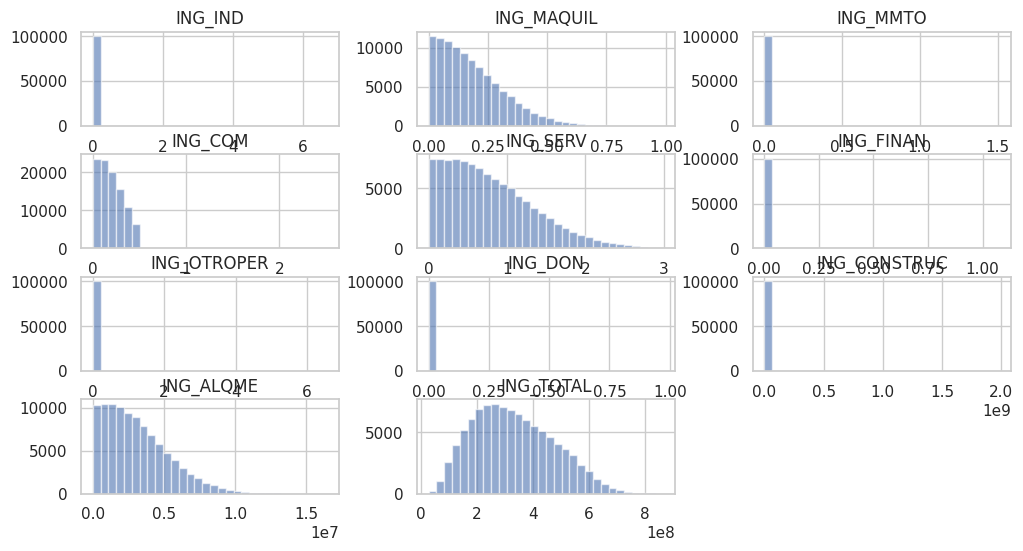

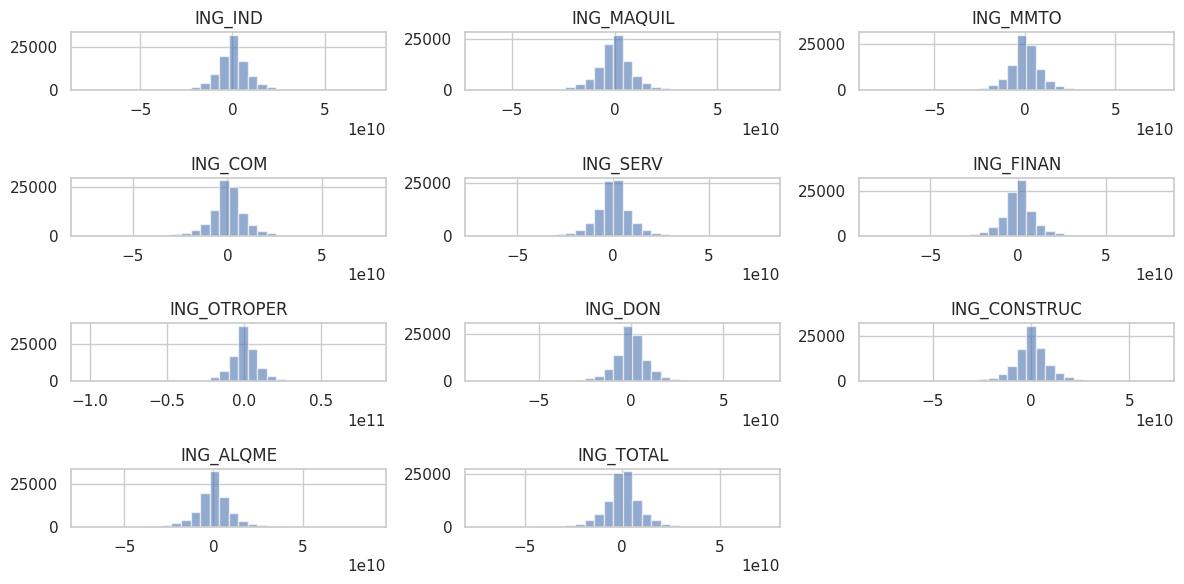

In [ ]:
# 3. Visualización opcional (si estás en Jupyter o Google Colab)
# -------------------------
import matplotlib.pyplot as plt
df_orig[variables_sensibles].hist(bins=30, figsize=(12, 6), alpha=0.6, label='Original')
df_anon[variables_sensibles].hist(bins=30, figsize=(12, 6), alpha=0.6, label='Anonimizado')
plt.legend(); plt.tight_layout(); plt.show()